In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from google.colab.patches import cv2_imshow

In [3]:
def detect_face_mask(image_path):

  #facial detection model

  prototxt_path = "/content/drive/My Drive/Mask_Detection/face_detector/deploy.prototxt"
  caffemodel = "/content/drive/My Drive/Mask_Detection/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
  new_model = cv2.dnn.readNet(prototxt_path,caffemodel)

  #loading the model trained on the dataset
  mobileNet = load_model('/content/drive/My Drive/Mask_Detection/MobileNetV2')

  #convertint the image into array of pixel
  image = np.array(Image.open(image_path).convert('RGB').resize((300,300)))

  #getting the height and widht of the image
  (h,w) = image.shape[:2]

  #construct a blob from the image
  blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))

  # pass the blob through the network and obtain the face detections
  new_model.setInput(blob)
  detections = new_model.forward()


  for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]

    if confidence>0.5:
      
      #we need the X,Y coordinates
      box=detections[0,0,i,3:7]*np.array([w,h,w,h])
      (startX,startY,endX,endY)=box.astype('int')

      #ensure the bounding boxes fall within the dimensions of the frame
      (startX,startY)=(max(0,startX),max(0,startY))
      (endX,endY)=(min(w-1,endX), min(h-1,endY))

      #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
      face=image[startY:endY, startX:endX]
      face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
      face=cv2.resize(face,(224,224))
      print(face.shape)
      face=img_to_array(face)
      face=preprocess_input(face)
      face = np.expand_dims(face,axis=0)

      pr = mobileNet.predict(face)
      pr_temp =  pr
      pr = np.around(pr,2)
      #pr = np.where(pr < 0.5, 0, 1)

      #determing the class label and the color of the bounding box
      if pr_temp[0] > 0.5:
        label = 'With Mask'
        color = (0,255,0)
      else:
        label = 'Without Mask'
        color = (255,0,0)

      #get the probability in the label
      a = ("{}: {}".format(label,pr))
      #label = "{}: {:.2f}%".format(label,(pr * 100))

      cv2.putText(image,a,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
      cv2.rectangle(image,(startX,startY),(endX,endY),color,2)


  plt.imshow(image)
  #cv2.imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

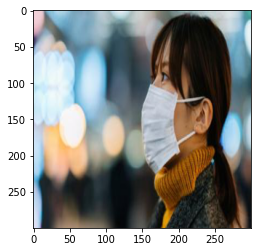

In [4]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/1_withmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)


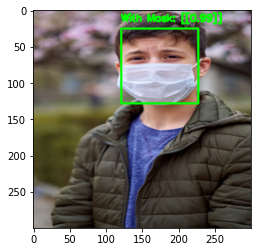

In [5]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/2_withmask.png"

detect_face_mask(image_path=image_path)

(224, 224, 3)


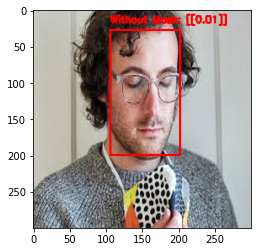

In [6]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/3_withoutmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)


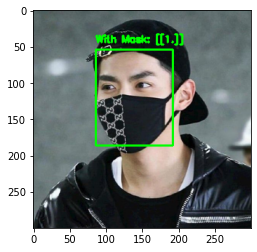

In [7]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/6_withmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)


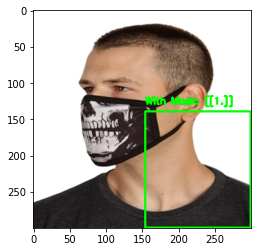

In [8]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/7_withmask.png"

detect_face_mask(image_path=image_path)

(224, 224, 3)


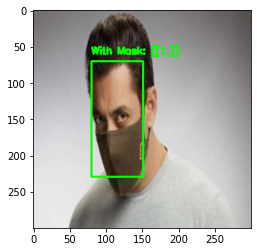

In [9]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/8_withmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)


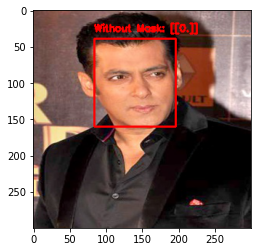

In [10]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/16_withoutmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


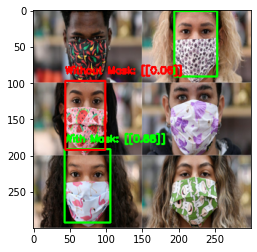

In [11]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/9_withmask.jpg"

detect_face_mask(image_path=image_path)

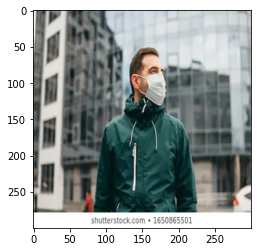

In [12]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/10_withmask.png"

detect_face_mask(image_path=image_path)

(224, 224, 3)


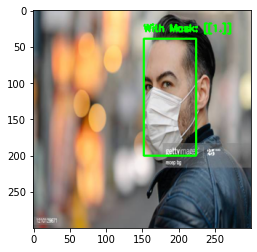

In [13]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/11_withmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)


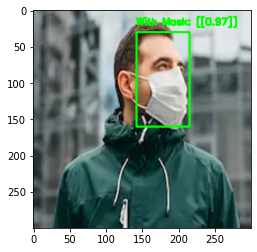

In [14]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/12_withmask.png"

detect_face_mask(image_path=image_path)

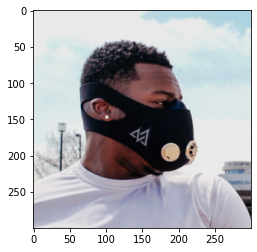

In [15]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/15_withmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)


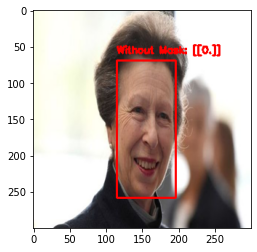

In [16]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/17_withoutmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)


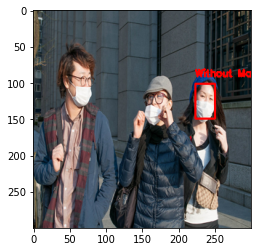

In [17]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/18_withmask.jpg"

detect_face_mask(image_path=image_path)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


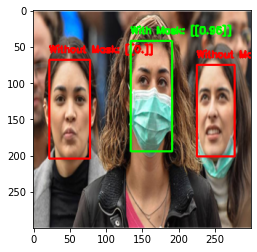

In [19]:
image_path = "/content/drive/My Drive/Mask_Detection/Example/Capture.PNG"

detect_face_mask(image_path=image_path)

In [18]:
!ls "/content/drive/My Drive/Mask_Detection/Example/"

10_withmask.png  15_withmask.jpg     1_withmask.jpg	7_withmask.png
11_withmask.jpg  16_withoutmask.jpg  2_withmask.png	8_withmask.jpg
12_withmask.png  17_withoutmask.jpg  3_withoutmask.jpg	9_withmask.jpg
14_withmask.png  18_withmask.jpg     6_withmask.jpg	Capture.PNG
